Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
! rm -r  '/content/Skin cancer ISIC The International Skin Imaging Collaboration'

### Importing all the important libraries

In [41]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import  Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
! pip3 install livelossplot
from livelossplot import PlotLossesKeras

In [42]:
!unzip '/content/drive/MyDrive/CNN_assignment.zip'

Archive:  /content/drive/MyDrive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating:

In [43]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

### Define Path for Skin Cancer Data

In [44]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [45]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [46]:
batch_size = 32
img_height = 180
img_width = 180

In [47]:
## Importing the required libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# reading the training images
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

# reading the validation images
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,subset="validation",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

# reading the test images
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,seed=123,image_size=(img_height, img_width),batch_size=batch_size)


# Normalising the training dataset
norm_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (norm_layer(x), y))
image, labels = next(iter(normalized_ds))

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.
Found 118 files belonging to 9 classes.


In [48]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [49]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Visualising the classes

Text(0.5, 1.0, 'Classes Counts')

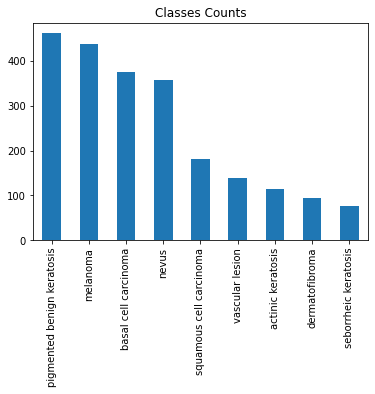

In [50]:

label_ = []
for i in os.listdir("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"):
  for j in os.listdir("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"+"/"+i):
      label_.append(i)
pd.Series(label_).value_counts().plot(kind = "bar")
plt.title("Classes Counts")

# Inference from above graph
"pogmented benign keratosis" is the highest occuring image type
and "seborrheic keratosis" is the lowest occuring image class.

# Plotting the images for each category

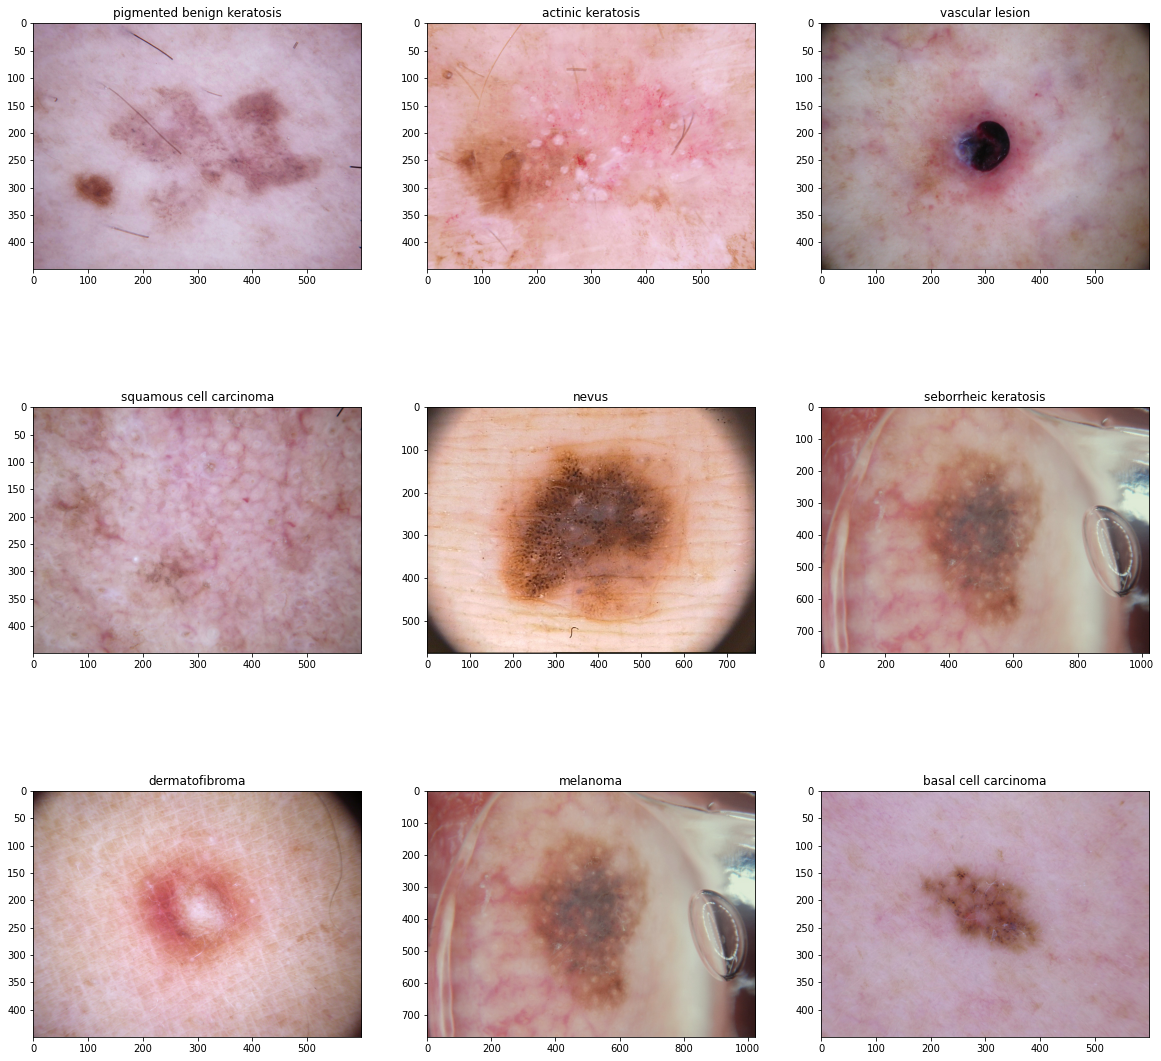

In [51]:
plt.figure(figsize = (20, 20))
ii = 1
for i in os.listdir("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"):
  plt.subplot(3,3,ii)
  for j in os.listdir("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"+"/"+i):
      img = cv2.imread("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"+"/"+i+"/"+j)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      plt.imshow(img)
      plt.title(i)
      ii +=1
      break
plt.show()

# Basic Convolution Neural Network

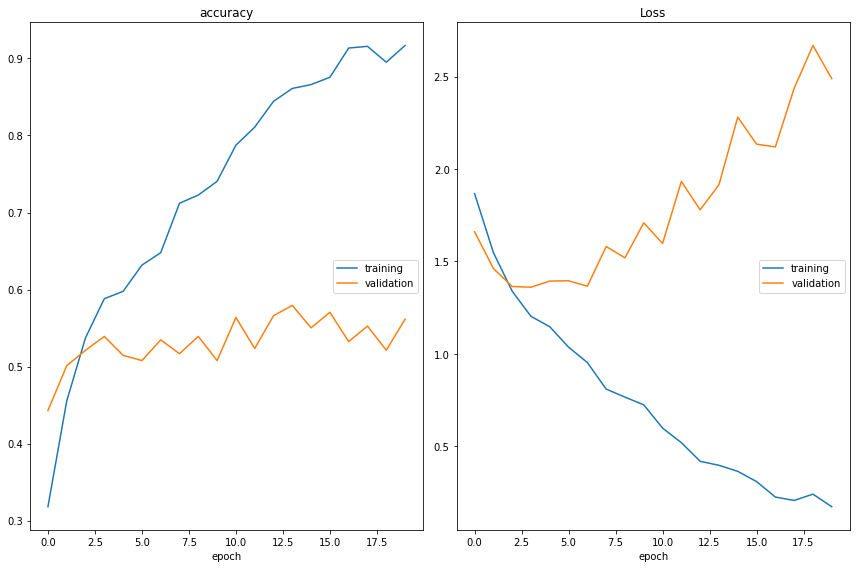

accuracy
	training         	 (min:    0.318, max:    0.917, cur:    0.917)
	validation       	 (min:    0.443, max:    0.579, cur:    0.562)
Loss
	training         	 (min:    0.172, max:    1.866, cur:    0.172)
	validation       	 (min:    1.360, max:    2.668, cur:    2.488)


In [52]:

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9)
])

# Compiling the Neural network
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

# Fitting the model 
epochs=20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs, callbacks=[PlotLossesKeras()])

# Plotting the accuracy and loss of the training

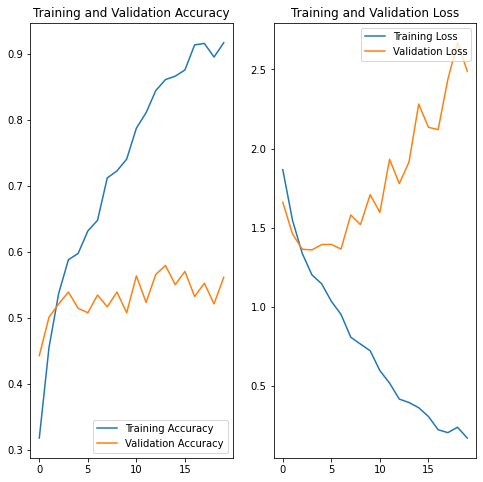

In [53]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Inference from above graphs:
As we can see from the above graph that the model start well but gradally the validation dataset accuracy started degrading, this is a sign of overfitting.

# Evaluation

In [54]:

predictions = []
labels =  []
for x, y in test_ds:
  predictions.extend(list(np.argmax(model.predict(x), axis = -1)))
  labels.extend(list(y.numpy()))
print(classification_report(predictions,labels));

              precision    recall  f1-score   support

           0       0.06      1.00      0.12         1
           1       0.50      0.40      0.44        20
           2       0.12      0.67      0.21         3
           3       0.19      0.20      0.19        15
           4       0.81      0.30      0.43        44
           5       0.69      0.38      0.49        29
           6       0.00      0.00      0.00         0
           7       0.06      0.33      0.11         3
           8       0.67      0.67      0.67         3

    accuracy                           0.35       118
   macro avg       0.34      0.44      0.30       118
weighted avg       0.60      0.35      0.41       118



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Improvement on the above model
1) data augmentation
2) applying regularisation(Dropout and Batch Normalisation)

### Data Augmentation

In [55]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height, img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

# CNN network with regularisation

In [56]:

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9)
])

In [57]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

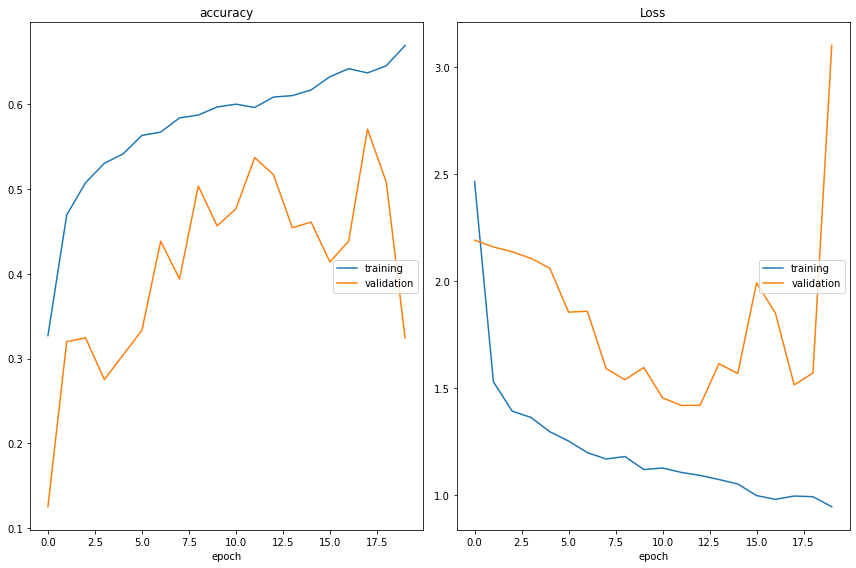

accuracy
	training         	 (min:    0.327, max:    0.669, cur:    0.669)
	validation       	 (min:    0.125, max:    0.570, cur:    0.324)
Loss
	training         	 (min:    0.946, max:    2.464, cur:    0.946)
	validation       	 (min:    1.419, max:    3.100, cur:    3.100)


In [58]:
epochs = 20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs, callbacks=[PlotLossesKeras()])

# Plotting the accuracy and loss of the training

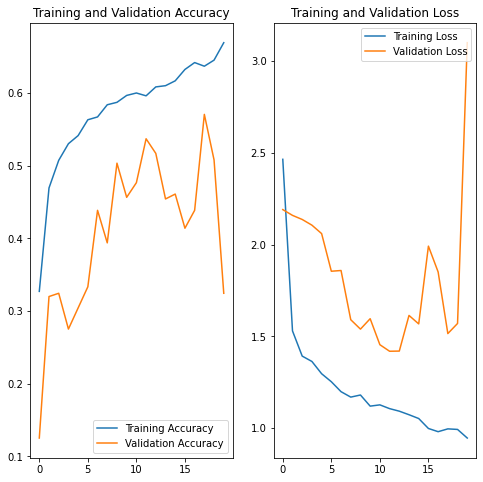

In [59]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Inference from above graphs
the graphs are better comapre to previous. Overfitting seems to have reduce to some extend. let do the data-balancing for making the result more better

### Evaluation

In [60]:

predictions = []
labels =  []
for x, y in test_ds:
  predictions.extend(list(np.argmax(model.predict(x), axis = -1)))
  labels.extend(list(y.numpy()))
print(classification_report(predictions,labels));

              precision    recall  f1-score   support

           0       0.44      0.29      0.35        24
           1       0.50      0.40      0.44        20
           2       0.00      0.00      0.00         0
           3       0.12      0.33      0.18         6
           4       0.31      0.21      0.25        24
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00         0
           7       0.38      0.27      0.32        22
           8       0.33      1.00      0.50         1

    accuracy                           0.25       118
   macro avg       0.23      0.28      0.23       118
weighted avg       0.32      0.25      0.27       118



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Data Balancing 

In [61]:
!pip3 install Augmentor
path_to_training_dataset= "/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.4)
    p.flip_top_bottom(probability=0.8)
    p.sample(500)

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F243C0EC9D0>: 100%|██████████| 500/500 [00:16<00:00, 30.62 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F243C269090>: 100%|██████████| 500/500 [00:15<00:00, 31.62 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F243C44F690>: 100%|██████████| 500/500 [00:17<00:00, 29.29 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=966x638 at 0x7F24918A9610>: 100%|██████████| 500/500 [01:25<00:00,  5.82 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F243C482210>: 100%|██████████| 500/500 [01:13<00:00,  6.80 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2491964E50>:   0%|          | 1/500 [00:00<01:33,  5.31 Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F243DB4CED0>: 100%|██████████| 500/500 [00:16<00:00, 30.49 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F243C3CC2D0>:   0%|          | 1/500 [00:00<01:12,  6.89 Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F243CD212D0>: 100%|██████████| 500/500 [00:38<00:00, 13.04 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F243C1BB910>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F243DF94ED0>: 100%|██████████| 500/500 [00:15<00:00, 31.58 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F243DE42050>: 100%|██████████| 500/500 [00:16<00:00, 30.54 Samples/s]


In [62]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [63]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027533.jpg_9a6df279-994b-4133-ab3c-9bceea11cb6f.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0024643.jpg_0fc94e6b-9816-48d2-a5c2-4aa400be78f4.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026511.jpg_27276b66-2b73-4cac-afbd-d0450d18a4f3.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027219.jpg_e8bfb068-b84e-4b12-a771-006d9874c687.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027023.jp

In [64]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [65]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [66]:
original_df = pd.DataFrame()
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

# plotting the classes after balancing

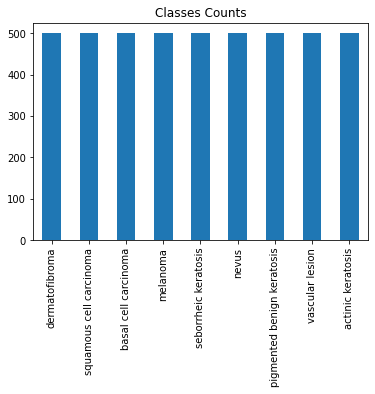

In [67]:
new_df['Label'].value_counts().plot(kind = "bar");
plt.title("Classes Counts");

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [68]:
train_ds_bal = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)
val_ds_bal = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,subset="validation",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

test_ds_bal = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.
Found 118 files belonging to 9 classes.


#### CNN Network

In [73]:
## your code goes here
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# ! pip3 install livelossplot
from livelossplot import PlotLossesKeras

model2 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9)
])

In [74]:
model2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

#### Train your model

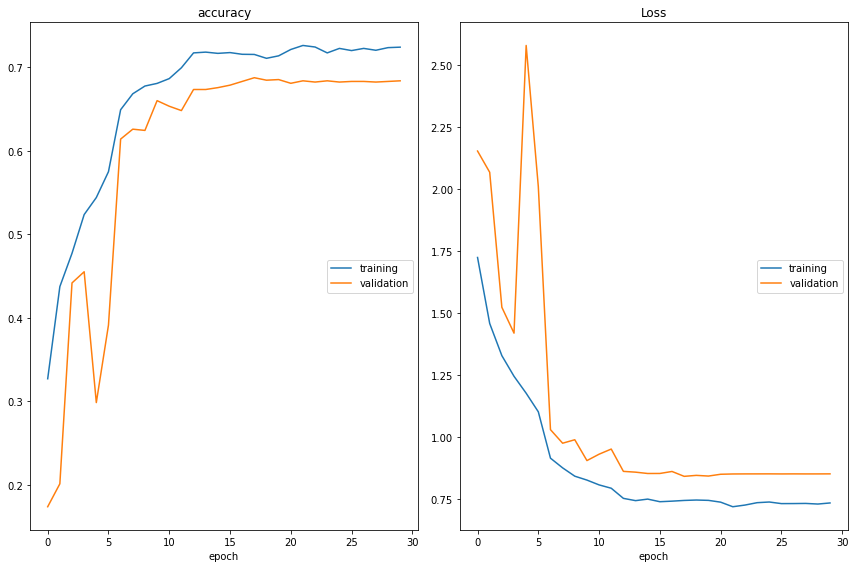

accuracy
	training         	 (min:    0.327, max:    0.726, cur:    0.724)
	validation       	 (min:    0.174, max:    0.687, cur:    0.684)
Loss
	training         	 (min:    0.718, max:    1.724, cur:    0.734)
	validation       	 (min:    0.841, max:    2.579, cur:    0.851)

Epoch 00030: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-11.


In [75]:
epochs = 30

lrate_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, verbose=2, mode='max')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

# history2 = model2.fit_generator(generator=train_ds_bal, validation_data= val_ds_bal,epochs=epochs,callbacks=[PlotLossesKeras(),early, lrate_reduce])
history = model2.fit(train_ds_bal,validation_data=val_ds_bal,epochs=epochs, callbacks=[PlotLossesKeras(), early, lrate_reduce])

####  Visualize the model results

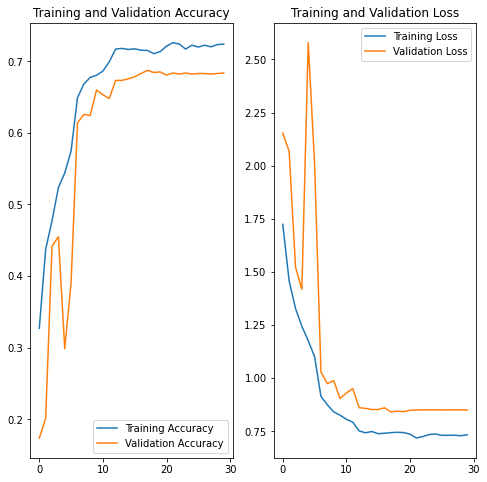

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [81]:
### Evaluation
predictions = []
labels =  []
for x, y in test_ds_bal:
  predictions.extend(list(np.argmax(model2.predict(x), axis = -1)))
  labels.extend(list(y.numpy()))
print(classification_report(predictions,labels))

              precision    recall  f1-score   support

           0       0.44      0.70      0.54        10
           1       0.44      0.78      0.56         9
           2       0.38      0.67      0.48         9
           3       0.12      0.20      0.15        10
           4       0.94      0.48      0.64        31
           5       0.69      0.50      0.58        22
           6       0.33      0.33      0.33         3
           7       0.50      0.40      0.44        20
           8       1.00      0.75      0.86         4

    accuracy                           0.51       118
   macro avg       0.54      0.53      0.51       118
weighted avg       0.61      0.51      0.53       118



#### Analyze the results. Did you get rid of underfitting/overfitting? Did class rebalance help?



Overfitting has been reduced. Data Balancing helped to a good extend. Results are better as compared to the model without balancing
